In [137]:
import requests
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://dogapi.dog/api/v2/breeds"

In [3]:
response = requests.get(url)
response.status_code

200

In [4]:
response.json()

{'data': [{'id': '68f47c5a-5115-47cd-9849-e45d3c378f12',
   'type': 'breed',
   'attributes': {'name': 'Caucasian Shepherd Dog',
    'description': 'The Caucasian Shepherd Dog is a large and powerful breed of dog from the Caucasus Mountains region. These dogs are large in size, with a thick double coat to protect them from the cold. They have a regal bearing, with a proud and confident demeanor. They are highly intelligent and loyal, making them excellent guard dogs. They are courageous and alert, with an instinct to protect their family and property. They are highly trainable, but require firm and consistent training.',
    'life': {'max': 20, 'min': 15},
    'male_weight': {'max': 90, 'min': 50},
    'female_weight': {'max': 70, 'min': 45},
    'hypoallergenic': False},
   'relationships': {'group': {'data': {'id': '8000793f-a1ae-4ec4-8d55-ef83f1f644e5',
      'type': 'group'}}}},
  {'id': '4ddbe251-72af-495e-8e9d-869217e1d92a',
   'type': 'breed',
   'attributes': {'name': 'Bouvier 

In [5]:
good_doggy =[]


# Starting URL
url = 'https://dogapi.dog/api/v2/breeds?page[number]=1'

while url:
    # Make the HTTP GET request
    response = requests.get(url)
    data = response.json()
    good_doggy.append(data)
    time.sleep(1)
    
    
    # Process the data as needed
    print(f"Fetching data from: {url}")
    
    # Update the URL to the next page
    url = data.get('links', {}).get('next')
    
    # If 'next' is None, the loop will terminate


Fetching data from: https://dogapi.dog/api/v2/breeds?page[number]=1
Fetching data from: https://dogapi.dog/api/v2/breeds?page[number]=2
Fetching data from: https://dogapi.dog/api/v2/breeds?page[number]=3
Fetching data from: https://dogapi.dog/api/v2/breeds?page[number]=4
Fetching data from: https://dogapi.dog/api/v2/breeds?page[number]=5
Fetching data from: https://dogapi.dog/api/v2/breeds?page[number]=6
Fetching data from: https://dogapi.dog/api/v2/breeds?page[number]=7
Fetching data from: https://dogapi.dog/api/v2/breeds?page[number]=8
Fetching data from: https://dogapi.dog/api/v2/breeds?page[number]=9
Fetching data from: https://dogapi.dog/api/v2/breeds?page[number]=10
Fetching data from: https://dogapi.dog/api/v2/breeds?page[number]=11
Fetching data from: https://dogapi.dog/api/v2/breeds?page[number]=12
Fetching data from: https://dogapi.dog/api/v2/breeds?page[number]=13
Fetching data from: https://dogapi.dog/api/v2/breeds?page[number]=14
Fetching data from: https://dogapi.dog/api/

In [6]:
good_doggy

[{'data': [{'id': '68f47c5a-5115-47cd-9849-e45d3c378f12',
    'type': 'breed',
    'attributes': {'name': 'Caucasian Shepherd Dog',
     'description': 'The Caucasian Shepherd Dog is a large and powerful breed of dog from the Caucasus Mountains region. These dogs are large in size, with a thick double coat to protect them from the cold. They have a regal bearing, with a proud and confident demeanor. They are highly intelligent and loyal, making them excellent guard dogs. They are courageous and alert, with an instinct to protect their family and property. They are highly trainable, but require firm and consistent training.',
     'life': {'max': 20, 'min': 15},
     'male_weight': {'max': 90, 'min': 50},
     'female_weight': {'max': 70, 'min': 45},
     'hypoallergenic': False},
    'relationships': {'group': {'data': {'id': '8000793f-a1ae-4ec4-8d55-ef83f1f644e5',
       'type': 'group'}}}},
   {'id': '4ddbe251-72af-495e-8e9d-869217e1d92a',
    'type': 'breed',
    'attributes': {'nam

In [11]:
good_doggy[0].keys()

dict_keys(['data', 'links'])

In [15]:
df = pd.DataFrame(good_doggy[20]['data'])

In [16]:
df.shape

(10, 4)

In [17]:
df2 = pd.json_normalize(df.to_dict(orient='records')) # this works 10 rows

In [18]:
df2.shape

(10, 13)

In [19]:
good_doggy[0]

{'data': [{'id': '68f47c5a-5115-47cd-9849-e45d3c378f12',
   'type': 'breed',
   'attributes': {'name': 'Caucasian Shepherd Dog',
    'description': 'The Caucasian Shepherd Dog is a large and powerful breed of dog from the Caucasus Mountains region. These dogs are large in size, with a thick double coat to protect them from the cold. They have a regal bearing, with a proud and confident demeanor. They are highly intelligent and loyal, making them excellent guard dogs. They are courageous and alert, with an instinct to protect their family and property. They are highly trainable, but require firm and consistent training.',
    'life': {'max': 20, 'min': 15},
    'male_weight': {'max': 90, 'min': 50},
    'female_weight': {'max': 70, 'min': 45},
    'hypoallergenic': False},
   'relationships': {'group': {'data': {'id': '8000793f-a1ae-4ec4-8d55-ef83f1f644e5',
      'type': 'group'}}}},
  {'id': '4ddbe251-72af-495e-8e9d-869217e1d92a',
   'type': 'breed',
   'attributes': {'name': 'Bouvier 

In [22]:
good_doggy[29]

IndexError: list index out of range

In [ ]:
#TEST WITH !

In [37]:
df_0 = pd.DataFrame(good_doggy[0]['data'])
df_0 = pd.json_normalize(df.to_dict(orient='records'))

In [36]:
df2['attributes.name'].unique()

array(['Caucasian Shepherd Dog', 'Bouvier des Flandres',
       'Grand Basset Griffon Vendéen', 'Hokkaido', 'Japanese Terrier',
       'Hanoverian Scenthound', 'Tibetan Spaniel', 'Border Collie',
       'Curly-Coated Retriever', 'Skye Terrier'], dtype=object)

In [33]:
df2

,id,type,attributes.name,attributes.description,attributes.life.max,attributes.life.min,attributes.male_weight.max,attributes.male_weight.min,attributes.female_weight.max,attributes.female_weight.min,attributes.hypoallergenic,relationships.group.data.id,relationships.group.data.type
0,68f47c5a-5115-47cd-9849-e45d3c378f12,breed,Caucasian Shepherd Dog,The Caucasian Shepherd Dog is a large and powe...,20,15,90,50,70,45,False,8000793f-a1ae-4ec4-8d55-ef83f1f644e5,group
1,4ddbe251-72af-495e-8e9d-869217e1d92a,breed,Bouvier des Flandres,The Bouvier des Flandres is a large and powerf...,14,10,40,30,35,25,False,b8e4e89d-057f-432a-9e58-0b85b29b693c,group
2,f534c847-bed1-4b58-b194-dc06ecfe20f9,breed,Grand Basset Griffon Vendéen,The Grand Basset Griffon Vendéen is a medium-s...,15,12,30,20,30,20,False,be0147df-7755-4228-b132-2518c0c6d10d,group
3,30f62219-e225-42cd-bd07-02425f944c07,breed,Hokkaido,The Hokkaido is a medium-sized breed of dog fr...,15,12,30,20,30,20,False,8000793f-a1ae-4ec4-8d55-ef83f1f644e5,group
4,087979f3-1c45-4d8a-a153-462bf5ea379e,breed,Japanese Terrier,The Japanese Terrier is a small breed of terri...,20,15,4,2,4,2,False,8000793f-a1ae-4ec4-8d55-ef83f1f644e5,group
5,dbff689b-8370-4b6a-9306-215aba549102,breed,Hanoverian Scenthound,The Hanoverian Scenthound is a medium-sized br...,14,12,25,20,25,20,False,8000793f-a1ae-4ec4-8d55-ef83f1f644e5,group
6,6f540c30-27a8-48cc-8d88-0b1d9fa99167,breed,Tibetan Spaniel,The Tibetan Spaniel is a small breed of spanie...,16,14,7,5,7,5,False,7f6ea988-366a-4e20-b4ba-4d04274fea61,group
7,20b1d8be-ae44-4a70-8526-0612904bc9b2,breed,Border Collie,The Border Collie is a medium-sized breed of h...,16,12,30,20,25,17,False,b8e4e89d-057f-432a-9e58-0b85b29b693c,group
8,6dee41b1-0805-4f4e-a079-c8b1cdfa1768,breed,Curly-Coated Retriever,The Curly-Coated Retriever is a large breed of...,14,12,34,27,32,25,False,ab110192-e41b-43ff-a630-f7aee156b33a,group
9,beff84c3-66c4-4335-beba-f346c2565881,breed,Skye Terrier,The Skye Terrier is a small breed of terrier f...,15,12,8,7,8,7,False,1bbf373b-1937-4e73-9863-45385daa4979,group


In [25]:
df2['attributes.name'].value_counts()

attributes.name
Caucasian Shepherd Dog          1
Bouvier des Flandres            1
Grand Basset Griffon Vendéen    1
Hokkaido                        1
Japanese Terrier                1
Hanoverian Scenthound           1
Tibetan Spaniel                 1
Border Collie                   1
Curly-Coated Retriever          1
Skye Terrier                    1
Name: count, dtype: int64

In [26]:
page_data = good_doggy[28]["data"]

In [27]:
page_data[0]

{'id': '036feed0-da8a-42c9-ab9a-57449b530b13',
 'type': 'breed',
 'attributes': {'name': 'Affenpinscher',
  'description': 'The Affenpinscher is a small and playful breed of dog that was originally bred in Germany for hunting small game. They are intelligent, energetic, and affectionate, and make excellent companion dogs.',
  'life': {'max': 16, 'min': 14},
  'male_weight': {'max': 5, 'min': 3},
  'female_weight': {'max': 5, 'min': 3},
  'hypoallergenic': True},
 'relationships': {'group': {'data': {'id': 'f56dc4b1-ba1a-4454-8ce2-bd5d41404a0c',
    'type': 'group'}}}}

In [32]:
page_data[0]["attributes"]["name"]

'Affenpinscher'

In [50]:
#All Together

df_0 = pd.DataFrame(good_doggy[0]['data'])
df_0 = pd.json_normalize(df.to_dict(orient='records'))


df_1 = pd.DataFrame(good_doggy[1]['data'])
df_1 = pd.json_normalize(df.to_dict(orient='records'))


df_2 = pd.DataFrame(good_doggy[2]['data'])
df_2 = pd.json_normalize(df.to_dict(orient='records'))


df_3 = pd.DataFrame(good_doggy[3]['data'])
df_3 = pd.json_normalize(df.to_dict(orient='records'))


df_4 = pd.DataFrame(good_doggy[4]['data'])
df_4 = pd.json_normalize(df.to_dict(orient='records'))


df_5 = pd.DataFrame(good_doggy[5]['data'])
df_5 = pd.json_normalize(df.to_dict(orient='records'))


df_6 = pd.DataFrame(good_doggy[6]['data'])
df_6 = pd.json_normalize(df.to_dict(orient='records'))


df_7 = pd.DataFrame(good_doggy[7]['data'])
df_7 = pd.json_normalize(df.to_dict(orient='records'))


df_8 = pd.DataFrame(good_doggy[8]['data'])
df_8 = pd.json_normalize(df.to_dict(orient='records'))


df_9 = pd.DataFrame(good_doggy[9]['data'])
df_9 = pd.json_normalize(df.to_dict(orient='records'))


df_10 = pd.DataFrame(good_doggy[10]['data'])
df_10 = pd.json_normalize(df.to_dict(orient='records'))


df_11 = pd.DataFrame(good_doggy[11]['data'])
df_11 = pd.json_normalize(df.to_dict(orient='records'))


df_12 = pd.DataFrame(good_doggy[12]['data'])
df_12 = pd.json_normalize(df.to_dict(orient='records'))


df_13 = pd.DataFrame(good_doggy[13]['data'])
df_13 = pd.json_normalize(df.to_dict(orient='records'))


df_14 = pd.DataFrame(good_doggy[14]['data'])
df_14 = pd.json_normalize(df.to_dict(orient='records'))


df_15 = pd.DataFrame(good_doggy[15]['data'])
df_15 = pd.json_normalize(df.to_dict(orient='records'))


df_16 = pd.DataFrame(good_doggy[16]['data'])
df_16 = pd.json_normalize(df.to_dict(orient='records'))


df_17 = pd.DataFrame(good_doggy[17]['data'])
df_17 = pd.json_normalize(df.to_dict(orient='records'))


df_18 = pd.DataFrame(good_doggy[18]['data'])
df_18 = pd.json_normalize(df.to_dict(orient='records'))


df_19 = pd.DataFrame(good_doggy[19]['data'])
df_19 = pd.json_normalize(df.to_dict(orient='records'))


df_20 = pd.DataFrame(good_doggy[20]['data'])
df_20 = pd.json_normalize(df.to_dict(orient='records'))


df_21 = pd.DataFrame(good_doggy[21]['data'])
df_21 = pd.json_normalize(df.to_dict(orient='records'))


df_22 = pd.DataFrame(good_doggy[22]['data'])
df_22 = pd.json_normalize(df.to_dict(orient='records'))


df_23 = pd.DataFrame(good_doggy[23]['data'])
df_23 = pd.json_normalize(df.to_dict(orient='records'))


df_24 = pd.DataFrame(good_doggy[24]['data'])
df_24 = pd.json_normalize(df.to_dict(orient='records'))


df_25 = pd.DataFrame(good_doggy[25]['data'])
df_25 = pd.json_normalize(df.to_dict(orient='records'))


df_26 = pd.DataFrame(good_doggy[26]['data'])
df_26 = pd.json_normalize(df.to_dict(orient='records'))


df_27 = pd.DataFrame(good_doggy[27]['data'])
df_27 = pd.json_normalize(df.to_dict(orient='records'))


df_28 = pd.DataFrame(good_doggy[28]['data'])
df_28 = pd.json_normalize(df.to_dict(orient='records'))


In [46]:
df_28.head(4)

,id,type,attributes.name,attributes.description,attributes.life.max,attributes.life.min,attributes.male_weight.max,attributes.male_weight.min,attributes.female_weight.max,attributes.female_weight.min,attributes.hypoallergenic,relationships.group.data.id,relationships.group.data.type
0,68f47c5a-5115-47cd-9849-e45d3c378f12,breed,Caucasian Shepherd Dog,The Caucasian Shepherd Dog is a large and powe...,20,15,90,50,70,45,False,8000793f-a1ae-4ec4-8d55-ef83f1f644e5,group
1,4ddbe251-72af-495e-8e9d-869217e1d92a,breed,Bouvier des Flandres,The Bouvier des Flandres is a large and powerf...,14,10,40,30,35,25,False,b8e4e89d-057f-432a-9e58-0b85b29b693c,group
2,f534c847-bed1-4b58-b194-dc06ecfe20f9,breed,Grand Basset Griffon Vendéen,The Grand Basset Griffon Vendéen is a medium-s...,15,12,30,20,30,20,False,be0147df-7755-4228-b132-2518c0c6d10d,group
3,30f62219-e225-42cd-bd07-02425f944c07,breed,Hokkaido,The Hokkaido is a medium-sized breed of dog fr...,15,12,30,20,30,20,False,8000793f-a1ae-4ec4-8d55-ef83f1f644e5,group


In [47]:
df_8.head(4)

,id,type,attributes.name,attributes.description,attributes.life.max,attributes.life.min,attributes.male_weight.max,attributes.male_weight.min,attributes.female_weight.max,attributes.female_weight.min,attributes.hypoallergenic,relationships.group.data.id,relationships.group.data.type
0,68f47c5a-5115-47cd-9849-e45d3c378f12,breed,Caucasian Shepherd Dog,The Caucasian Shepherd Dog is a large and powe...,20,15,90,50,70,45,False,8000793f-a1ae-4ec4-8d55-ef83f1f644e5,group
1,4ddbe251-72af-495e-8e9d-869217e1d92a,breed,Bouvier des Flandres,The Bouvier des Flandres is a large and powerf...,14,10,40,30,35,25,False,b8e4e89d-057f-432a-9e58-0b85b29b693c,group
2,f534c847-bed1-4b58-b194-dc06ecfe20f9,breed,Grand Basset Griffon Vendéen,The Grand Basset Griffon Vendéen is a medium-s...,15,12,30,20,30,20,False,be0147df-7755-4228-b132-2518c0c6d10d,group
3,30f62219-e225-42cd-bd07-02425f944c07,breed,Hokkaido,The Hokkaido is a medium-sized breed of dog fr...,15,12,30,20,30,20,False,8000793f-a1ae-4ec4-8d55-ef83f1f644e5,group


In [51]:
df_2['attributes.name'].unique()

array(['Caucasian Shepherd Dog', 'Bouvier des Flandres',
       'Grand Basset Griffon Vendéen', 'Hokkaido', 'Japanese Terrier',
       'Hanoverian Scenthound', 'Tibetan Spaniel', 'Border Collie',
       'Curly-Coated Retriever', 'Skye Terrier'], dtype=object)

In [52]:
df_3['attributes.name'].unique()

array(['Caucasian Shepherd Dog', 'Bouvier des Flandres',
       'Grand Basset Griffon Vendéen', 'Hokkaido', 'Japanese Terrier',
       'Hanoverian Scenthound', 'Tibetan Spaniel', 'Border Collie',
       'Curly-Coated Retriever', 'Skye Terrier'], dtype=object)

### RESET

In [62]:
import requests
import time
import pandas as pd

In [78]:
url_1 = "https://dogapi.dog/api/v2/breeds?page[number]=1"
url_2 = "https://dogapi.dog/api/v2/breeds?page[number]=2"
url_3 = "https://dogapi.dog/api/v2/breeds?page[number]=3"
url_4 = "https://dogapi.dog/api/v2/breeds?page[number]=4"
url_5 = "https://dogapi.dog/api/v2/breeds?page[number]=5"
url_6 = "https://dogapi.dog/api/v2/breeds?page[number]=6"
url_7 = "https://dogapi.dog/api/v2/breeds?page[number]=7"
url_8 = "https://dogapi.dog/api/v2/breeds?page[number]=8"
url_9 = "https://dogapi.dog/api/v2/breeds?page[number]=9"
url_10 = "https://dogapi.dog/api/v2/breeds?page[number]=10"
url_11 = "https://dogapi.dog/api/v2/breeds?page[number]=11"
url_12 = "https://dogapi.dog/api/v2/breeds?page[number]=12"
url_13 = "https://dogapi.dog/api/v2/breeds?page[number]=13"
url_14 = "https://dogapi.dog/api/v2/breeds?page[number]=14"
url_15 = "https://dogapi.dog/api/v2/breeds?page[number]=15"
url_16 = "https://dogapi.dog/api/v2/breeds?page[number]=16"
url_17 = "https://dogapi.dog/api/v2/breeds?page[number]=17"
url_18 = "https://dogapi.dog/api/v2/breeds?page[number]=18"
url_19 = "https://dogapi.dog/api/v2/breeds?page[number]=19"
url_20 = "https://dogapi.dog/api/v2/breeds?page[number]=20"
url_21 = "https://dogapi.dog/api/v2/breeds?page[number]=21"
url_22 = "https://dogapi.dog/api/v2/breeds?page[number]=22"
url_23 = "https://dogapi.dog/api/v2/breeds?page[number]=23"
url_24 = "https://dogapi.dog/api/v2/breeds?page[number]=24"
url_25 = "https://dogapi.dog/api/v2/breeds?page[number]=25"
url_26 = "https://dogapi.dog/api/v2/breeds?page[number]=26"
url_27 = "https://dogapi.dog/api/v2/breeds?page[number]=27"
url_28 = "https://dogapi.dog/api/v2/breeds?page[number]=28"
url_29 = "https://dogapi.dog/api/v2/breeds?page[number]=29"

In [67]:
response = requests.get(url_1)
response.status_code

200

In [68]:
response.json()

{'data': [{'id': '68f47c5a-5115-47cd-9849-e45d3c378f12',
   'type': 'breed',
   'attributes': {'name': 'Caucasian Shepherd Dog',
    'description': 'The Caucasian Shepherd Dog is a large and powerful breed of dog from the Caucasus Mountains region. These dogs are large in size, with a thick double coat to protect them from the cold. They have a regal bearing, with a proud and confident demeanor. They are highly intelligent and loyal, making them excellent guard dogs. They are courageous and alert, with an instinct to protect their family and property. They are highly trainable, but require firm and consistent training.',
    'life': {'max': 20, 'min': 15},
    'male_weight': {'max': 90, 'min': 50},
    'female_weight': {'max': 70, 'min': 45},
    'hypoallergenic': False},
   'relationships': {'group': {'data': {'id': '8000793f-a1ae-4ec4-8d55-ef83f1f644e5',
      'type': 'group'}}}},
  {'id': '4ddbe251-72af-495e-8e9d-869217e1d92a',
   'type': 'breed',
   'attributes': {'name': 'Bouvier 

In [77]:
dog_1 = []

for i in range(10):
    response = requests.get(url_1)
    data_1 = response.json()
    dog_1.append(data_1)
    time.sleep(1)



In [76]:
dog_1

[{'data': [{'id': '68f47c5a-5115-47cd-9849-e45d3c378f12',
    'type': 'breed',
    'attributes': {'name': 'Caucasian Shepherd Dog',
     'description': 'The Caucasian Shepherd Dog is a large and powerful breed of dog from the Caucasus Mountains region. These dogs are large in size, with a thick double coat to protect them from the cold. They have a regal bearing, with a proud and confident demeanor. They are highly intelligent and loyal, making them excellent guard dogs. They are courageous and alert, with an instinct to protect their family and property. They are highly trainable, but require firm and consistent training.',
     'life': {'max': 20, 'min': 15},
     'male_weight': {'max': 90, 'min': 50},
     'female_weight': {'max': 70, 'min': 45},
     'hypoallergenic': False},
    'relationships': {'group': {'data': {'id': '8000793f-a1ae-4ec4-8d55-ef83f1f644e5',
       'type': 'group'}}}},
   {'id': '4ddbe251-72af-495e-8e9d-869217e1d92a',
    'type': 'breed',
    'attributes': {'nam

In [80]:
dog_1 = []

for i in range(10):
    response = requests.get(url_1)
    data_1 = response.json()
    dog_1.append(data_1)
    time.sleep(1)

dog_2 = []

for i in range(10):
    response = requests.get(url_2)
    data_2 = response.json()
    dog_2.append(data_2)
    time.sleep(1)

dog_3 = []

for i in range(10):
    response = requests.get(url_3)
    data_3 = response.json()
    dog_3.append(data_3)
    time.sleep(1)

dog_4 = []

for i in range(10):
    response = requests.get(url_4)
    data_4 = response.json()
    dog_4.append(data_4)
    time.sleep(1)

dog_5 = []

for i in range(10):
    response = requests.get(url_5)
    data_5 = response.json()
    dog_5.append(data_5)
    time.sleep(1)

dog_6 = []

for i in range(10):
    response = requests.get(url_6)
    data_6 = response.json()
    dog_6.append(data_6)
    time.sleep(1)

dog_7 = []

for i in range(10):
    response = requests.get(url_7)
    data_7 = response.json()
    dog_7.append(data_7)
    time.sleep(1)

dog_8 = []

for i in range(10):
    response = requests.get(url_8)
    data_8 = response.json()
    dog_8.append(data_8)
    time.sleep(1)

dog_9 = []

for i in range(10):
    response = requests.get(url_9)
    data_9 = response.json()
    dog_9.append(data_9)
    time.sleep(1)

dog_10 = []

for i in range(10):
    response = requests.get(url_10)
    data_10 = response.json()
    dog_10.append(data_10)
    time.sleep(1)

dog_11 = []

for i in range(10):
    response = requests.get(url_11)
    data_11 = response.json()
    dog_11.append(data_11)
    time.sleep(1)

dog_12 = []

for i in range(10):
    response = requests.get(url_12)
    data_12 = response.json()
    dog_12.append(data_12)
    time.sleep(1)

dog_13 = []

for i in range(10):
    response = requests.get(url_13)
    data_13 = response.json()
    dog_13.append(data_13)
    time.sleep(1)

dog_14 = []

for i in range(10):
    response = requests.get(url_14)
    data_14 = response.json()
    dog_14.append(data_14)
    time.sleep(1)

dog_15 = []

for i in range(10):
    response = requests.get(url_15)
    data_15 = response.json()
    dog_15.append(data_15)
    time.sleep(1)

dog_16 = []

for i in range(10):
    response = requests.get(url_16)
    data_16 = response.json()
    dog_16.append(data_16)
    time.sleep(1)

dog_17 = []

for i in range(10):
    response = requests.get(url_17)
    data_17 = response.json()
    dog_17.append(data_17)
    time.sleep(1)

dog_18 = []

for i in range(10):
    response = requests.get(url_18)
    data_18 = response.json()
    dog_18.append(data_18)
    time.sleep(1)

dog_19 = []

for i in range(10):
    response = requests.get(url_19)
    data_19 = response.json()
    dog_19.append(data_19)
    time.sleep(1)

dog_20 = []

for i in range(10):
    response = requests.get(url_20)
    data_20 = response.json()
    dog_20.append(data_20)
    time.sleep(1)

dog_21 = []

for i in range(10):
    response = requests.get(url_21)
    data_21 = response.json()
    dog_21.append(data_21)
    time.sleep(1)

dog_22 = []

for i in range(10):
    response = requests.get(url_22)
    data_22 = response.json()
    dog_22.append(data_22)
    time.sleep(1)

dog_23 = []

for i in range(10):
    response = requests.get(url_23)
    data_23 = response.json()
    dog_23.append(data_23)
    time.sleep(1)

dog_24 = []

for i in range(10):
    response = requests.get(url_24)
    data_24 = response.json()
    dog_24.append(data_24)
    time.sleep(1)

dog_25 = []

for i in range(10):
    response = requests.get(url_25)
    data_25 = response.json()
    dog_25.append(data_25)
    time.sleep(1)

dog_26 = []

for i in range(10):
    response = requests.get(url_26)
    data_26 = response.json()
    dog_26.append(data_26)
    time.sleep(1)

dog_27 = []

for i in range(10):
    response = requests.get(url_27)
    data_27 = response.json()
    dog_27.append(data_27)
    time.sleep(1)

dog_28 = []

for i in range(10):
    response = requests.get(url_28)
    data_28 = response.json()
    dog_28.append(data_28)
    time.sleep(1)

dog_29 = []

for i in range(10):
    response = requests.get(url_29)
    data_29 = response.json()
    dog_29.append(data_29)
    time.sleep(1)

In [81]:
dog_28

[{'data': [{'id': 'dd9362cc-52e0-462d-b856-fccdcf24b140',
    'type': 'breed',
    'attributes': {'name': 'Afghan Hound',
     'description': 'The Afghan Hound is a large and elegant breed of dog that was originally bred in Afghanistan for hunting small game. They are intelligent, independent, and athletic, and make excellent companion dogs.',
     'life': {'max': 14, 'min': 12},
     'male_weight': {'max': 27, 'min': 23},
     'female_weight': {'max': 25, 'min': 20},
     'hypoallergenic': False},
    'relationships': {'group': {'data': {'id': 'be0147df-7755-4228-b132-2518c0c6d10d',
       'type': 'group'}}}},
   {'id': '3fb566ec-ed2b-4ede-8d9e-0155e3eeccb3',
    'type': 'breed',
    'attributes': {'name': 'Kishu Ken',
     'description': 'The Kishu Ken is a medium-sized breed of dog that was originally bred in Japan for hunting small game. They are intelligent, independent, and alert, and make excellent hunting dogs.',
     'life': {'max': 15, 'min': 12},
     'male_weight': {'max': 

In [82]:
dog_27

[{'data': [{'id': 'feaa80fe-68bc-42b9-b2b5-2220ec4ff615',
    'type': 'breed',
    'attributes': {'name': 'Havanese',
     'description': 'The Havanese is a small and playful breed of dog that was originally bred in Cuba as a companion dog. They are intelligent, affectionate, and loyal, and make excellent family pets.',
     'life': {'max': 16, 'min': 14},
     'male_weight': {'max': 5, 'min': 3},
     'female_weight': {'max': 5, 'min': 3},
     'hypoallergenic': False},
    'relationships': {'group': {'data': {'id': 'f56dc4b1-ba1a-4454-8ce2-bd5d41404a0c',
       'type': 'group'}}}},
   {'id': '4205d787-90f6-4f53-8dc9-87d9b61d90be',
    'type': 'breed',
    'attributes': {'name': 'Peruvian Inca Orchid',
     'description': 'The Peruvian Inca Orchid is a small and agile breed of dog that was originally bred in Peru for hunting small game. They are intelligent, energetic, and determined, and make excellent hunting dogs.',
     'life': {'max': 15, 'min': 12},
     'male_weight': {'max': 1

In [104]:
df_1 = pd.DataFrame(dog_1[0]['data'])
df_1 = pd.json_normalize(df_1.to_dict(orient='records'))

df_2 = pd.DataFrame(dog_2[0]['data'])
df_2 = pd.json_normalize(df_2.to_dict(orient='records'))

df_3 = pd.DataFrame(dog_3[0]['data'])
df_3 = pd.json_normalize(df_3.to_dict(orient='records'))

df_4 = pd.DataFrame(dog_4[0]['data'])
df_4 = pd.json_normalize(df_4.to_dict(orient='records'))

df_5 = pd.DataFrame(dog_5[0]['data'])
df_5 = pd.json_normalize(df_5.to_dict(orient='records'))

df_6 = pd.DataFrame(dog_6[0]['data'])
df_6 = pd.json_normalize(df_6.to_dict(orient='records'))

df_7 = pd.DataFrame(dog_7[0]['data'])
df_7 = pd.json_normalize(df_7.to_dict(orient='records'))

df_8 = pd.DataFrame(dog_8[0]['data'])
df_8 = pd.json_normalize(df_8.to_dict(orient='records'))

df_9 = pd.DataFrame(dog_9[0]['data'])
df_9 = pd.json_normalize(df_9.to_dict(orient='records'))

df_10 = pd.DataFrame(dog_10[0]['data'])
df_10 = pd.json_normalize(df_10.to_dict(orient='records'))

df_11 = pd.DataFrame(dog_11[0]['data'])
df_11 = pd.json_normalize(df_11.to_dict(orient='records'))

df_12 = pd.DataFrame(dog_12[0]['data'])
df_12 = pd.json_normalize(df_12.to_dict(orient='records'))

df_13 = pd.DataFrame(dog_13[0]['data'])
df_13 = pd.json_normalize(df_13.to_dict(orient='records'))

df_14 = pd.DataFrame(dog_14[0]['data'])
df_14 = pd.json_normalize(df_14.to_dict(orient='records'))

df_15 = pd.DataFrame(dog_15[0]['data'])
df_15 = pd.json_normalize(df_15.to_dict(orient='records'))

df_16 = pd.DataFrame(dog_16[0]['data'])
df_16 = pd.json_normalize(df_16.to_dict(orient='records'))

df_17 = pd.DataFrame(dog_17[0]['data'])
df_17 = pd.json_normalize(df_17.to_dict(orient='records'))

df_18 = pd.DataFrame(dog_18[0]['data'])
df_18 = pd.json_normalize(df_18.to_dict(orient='records'))

df_19 = pd.DataFrame(dog_19[0]['data'])
df_19 = pd.json_normalize(df_19.to_dict(orient='records'))

df_20 = pd.DataFrame(dog_20[0]['data'])
df_20 = pd.json_normalize(df_20.to_dict(orient='records'))

df_21 = pd.DataFrame(dog_21[0]['data'])
df_21 = pd.json_normalize(df_21.to_dict(orient='records'))

df_22 = pd.DataFrame(dog_22[0]['data'])
df_22 = pd.json_normalize(df_22.to_dict(orient='records'))

df_23 = pd.DataFrame(dog_23[0]['data'])
df_23 = pd.json_normalize(df_23.to_dict(orient='records'))

df_24 = pd.DataFrame(dog_24[0]['data'])
df_24 = pd.json_normalize(df_24.to_dict(orient='records'))

df_25 = pd.DataFrame(dog_25[0]['data'])
df_25 = pd.json_normalize(df_25.to_dict(orient='records'))

df_26 = pd.DataFrame(dog_26[0]['data'])
df_26 = pd.json_normalize(df_26.to_dict(orient='records'))

df_27 = pd.DataFrame(dog_27[0]['data'])
df_27 = pd.json_normalize(df_27.to_dict(orient='records'))

df_28 = pd.DataFrame(dog_28[0]['data'])
df_28 = pd.json_normalize(df_28.to_dict(orient='records'))

df_29 = pd.DataFrame(dog_29[0]['data'])
df_29 = pd.json_normalize(df_29.to_dict(orient='records'))


In [108]:
df = pd.concat([
    df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10,
    df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20,
    df_21, df_22, df_23, df_24, df_25, df_26, df_27, df_28, df_29])


In [109]:
df

,id,type,attributes.name,attributes.description,attributes.life.max,attributes.life.min,attributes.male_weight.max,attributes.male_weight.min,attributes.female_weight.max,attributes.female_weight.min,attributes.hypoallergenic,relationships.group.data.id,relationships.group.data.type
0,68f47c5a-5115-47cd-9849-e45d3c378f12,breed,Caucasian Shepherd Dog,The Caucasian Shepherd Dog is a large and powe...,20,15,90,50,70,45,False,8000793f-a1ae-4ec4-8d55-ef83f1f644e5,group
1,4ddbe251-72af-495e-8e9d-869217e1d92a,breed,Bouvier des Flandres,The Bouvier des Flandres is a large and powerf...,14,10,40,30,35,25,False,b8e4e89d-057f-432a-9e58-0b85b29b693c,group
2,f534c847-bed1-4b58-b194-dc06ecfe20f9,breed,Grand Basset Griffon Vendéen,The Grand Basset Griffon Vendéen is a medium-s...,15,12,30,20,30,20,False,be0147df-7755-4228-b132-2518c0c6d10d,group
3,30f62219-e225-42cd-bd07-02425f944c07,breed,Hokkaido,The Hokkaido is a medium-sized breed of dog fr...,15,12,30,20,30,20,False,8000793f-a1ae-4ec4-8d55-ef83f1f644e5,group
4,087979f3-1c45-4d8a-a153-462bf5ea379e,breed,Japanese Terrier,The Japanese Terrier is a small breed of terri...,20,15,4,2,4,2,False,8000793f-a1ae-4ec4-8d55-ef83f1f644e5,group
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,52124cb6-e1eb-4887-904f-ab06a3ace3f1,breed,Chinese Crested,"The Chinese Crested is a small, hairless breed...",16,14,5,3,5,3,True,f56dc4b1-ba1a-4454-8ce2-bd5d41404a0c,group
9,6eab391a-9497-4283-b994-81a17b5810b1,breed,Italian Greyhound,The Italian Greyhound is a small and slender b...,16,14,5,3,5,3,True,f56dc4b1-ba1a-4454-8ce2-bd5d41404a0c,group
0,036feed0-da8a-42c9-ab9a-57449b530b13,breed,Affenpinscher,The Affenpinscher is a small and playful breed...,16,14,5,3,5,3,True,f56dc4b1-ba1a-4454-8ce2-bd5d41404a0c,group
1,43cdadb4-851b-4a3a-99c1-5f63d08d97f8,breed,Xoloitzcuintli,"The Xoloitzcuintli, also known as the Mexican ...",15,12,15,10,15,10,True,7f6ea988-366a-4e20-b4ba-4d04274fea61,group


In [113]:
df.rename(columns={"attributes.name":"Breed", "attributes.description":"Description", "attributes.life.max":"Max Life","attributes.life.min":"Min Life","attributes.male_weight.max":"Male Max Weight","attributes.male_weight.min":"Male Min Weight","attributes.female_weight.max":"Female Max Weight","attributes.female_weight.min":"Female Min Weight","attributes.hypoallergenic":"Hypoallergenic" }, inplace=True)

In [114]:
df

,id,type,Breed,Description,Max Life,Min Life,Male Max Weight,Male Min Weight,Female Max Weight,Female Min Weight,Hypoallergenic,relationships.group.data.id,relationships.group.data.type
0,68f47c5a-5115-47cd-9849-e45d3c378f12,breed,Caucasian Shepherd Dog,The Caucasian Shepherd Dog is a large and powe...,20,15,90,50,70,45,False,8000793f-a1ae-4ec4-8d55-ef83f1f644e5,group
1,4ddbe251-72af-495e-8e9d-869217e1d92a,breed,Bouvier des Flandres,The Bouvier des Flandres is a large and powerf...,14,10,40,30,35,25,False,b8e4e89d-057f-432a-9e58-0b85b29b693c,group
2,f534c847-bed1-4b58-b194-dc06ecfe20f9,breed,Grand Basset Griffon Vendéen,The Grand Basset Griffon Vendéen is a medium-s...,15,12,30,20,30,20,False,be0147df-7755-4228-b132-2518c0c6d10d,group
3,30f62219-e225-42cd-bd07-02425f944c07,breed,Hokkaido,The Hokkaido is a medium-sized breed of dog fr...,15,12,30,20,30,20,False,8000793f-a1ae-4ec4-8d55-ef83f1f644e5,group
4,087979f3-1c45-4d8a-a153-462bf5ea379e,breed,Japanese Terrier,The Japanese Terrier is a small breed of terri...,20,15,4,2,4,2,False,8000793f-a1ae-4ec4-8d55-ef83f1f644e5,group
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,52124cb6-e1eb-4887-904f-ab06a3ace3f1,breed,Chinese Crested,"The Chinese Crested is a small, hairless breed...",16,14,5,3,5,3,True,f56dc4b1-ba1a-4454-8ce2-bd5d41404a0c,group
9,6eab391a-9497-4283-b994-81a17b5810b1,breed,Italian Greyhound,The Italian Greyhound is a small and slender b...,16,14,5,3,5,3,True,f56dc4b1-ba1a-4454-8ce2-bd5d41404a0c,group
0,036feed0-da8a-42c9-ab9a-57449b530b13,breed,Affenpinscher,The Affenpinscher is a small and playful breed...,16,14,5,3,5,3,True,f56dc4b1-ba1a-4454-8ce2-bd5d41404a0c,group
1,43cdadb4-851b-4a3a-99c1-5f63d08d97f8,breed,Xoloitzcuintli,"The Xoloitzcuintli, also known as the Mexican ...",15,12,15,10,15,10,True,7f6ea988-366a-4e20-b4ba-4d04274fea61,group


In [115]:
df.drop(columns=['id','type','relationships.group.data.id','relationships.group.data.type'], inplace=True)

In [116]:
df

,Breed,Description,Max Life,Min Life,Male Max Weight,Male Min Weight,Female Max Weight,Female Min Weight,Hypoallergenic
0,Caucasian Shepherd Dog,The Caucasian Shepherd Dog is a large and powe...,20,15,90,50,70,45,False
1,Bouvier des Flandres,The Bouvier des Flandres is a large and powerf...,14,10,40,30,35,25,False
2,Grand Basset Griffon Vendéen,The Grand Basset Griffon Vendéen is a medium-s...,15,12,30,20,30,20,False
3,Hokkaido,The Hokkaido is a medium-sized breed of dog fr...,15,12,30,20,30,20,False
4,Japanese Terrier,The Japanese Terrier is a small breed of terri...,20,15,4,2,4,2,False
...,...,...,...,...,...,...,...,...,...
8,Chinese Crested,"The Chinese Crested is a small, hairless breed...",16,14,5,3,5,3,True
9,Italian Greyhound,The Italian Greyhound is a small and slender b...,16,14,5,3,5,3,True
0,Affenpinscher,The Affenpinscher is a small and playful breed...,16,14,5,3,5,3,True
1,Xoloitzcuintli,"The Xoloitzcuintli, also known as the Mexican ...",15,12,15,10,15,10,True


In [122]:
size_conditions = [
    (df['Male Max Weight'] < 10) & (df['Female Max Weight'] < 10), 
    ((df['Male Max Weight'] >= 10) & (df['Male Max Weight'] <= 25)) & 
    ((df['Female Max Weight'] >= 10) & (df['Female Max Weight'] <= 25)),
    ((df['Male Max Weight'] > 25) & (df['Male Max Weight'] <= 45)) & 
    ((df['Female Max Weight'] > 25) & (df['Female Max Weight'] <= 45)),
    (df['Male Max Weight'] > 45) & (df['Female Max Weight'] > 45)
]


size_categories = [
    'Small',
    'Medium',
    'Large',
    'Giant'
]

In [123]:
df['Size Category'] = np.select(size_conditions, size_categories, default='Unknown')

In [124]:
df

,Breed,Description,Max Life,Min Life,Male Max Weight,Male Min Weight,Female Max Weight,Female Min Weight,Hypoallergenic,Size Category
0,Caucasian Shepherd Dog,The Caucasian Shepherd Dog is a large and powe...,20,15,90,50,70,45,False,Giant
1,Bouvier des Flandres,The Bouvier des Flandres is a large and powerf...,14,10,40,30,35,25,False,Large
2,Grand Basset Griffon Vendéen,The Grand Basset Griffon Vendéen is a medium-s...,15,12,30,20,30,20,False,Large
3,Hokkaido,The Hokkaido is a medium-sized breed of dog fr...,15,12,30,20,30,20,False,Large
4,Japanese Terrier,The Japanese Terrier is a small breed of terri...,20,15,4,2,4,2,False,Small
...,...,...,...,...,...,...,...,...,...,...
8,Chinese Crested,"The Chinese Crested is a small, hairless breed...",16,14,5,3,5,3,True,Small
9,Italian Greyhound,The Italian Greyhound is a small and slender b...,16,14,5,3,5,3,True,Small
0,Affenpinscher,The Affenpinscher is a small and playful breed...,16,14,5,3,5,3,True,Small
1,Xoloitzcuintli,"The Xoloitzcuintli, also known as the Mexican ...",15,12,15,10,15,10,True,Medium


In [126]:
df['Size Category'].value_counts()

Size Category
Large      89
Medium     89
Small      61
Giant      31
Unknown    13
Name: count, dtype: int64

In [127]:
df[df['Size Category'] == 'Unknown']

,Breed,Description,Max Life,Min Life,Male Max Weight,Male Min Weight,Female Max Weight,Female Min Weight,Hypoallergenic,Size Category
7,Border Collie,The Border Collie is a medium-sized breed of h...,16,12,30,20,25,17,False,Unknown
3,Old English Sheepdog,The Old English Sheepdog is a large breed of h...,12,10,50,40,45,35,False,Unknown
4,Perro de Presa Canario,The Perro de Presa Canario is a large breed of...,12,10,50,40,45,35,False,Unknown
8,Australian Shepherd,The Australian Shepherd is a medium-sized bree...,15,12,30,20,25,17,False,Unknown
9,Siberian Husky,The Siberian Husky is a medium-sized working d...,14,12,27,20,23,16,False,Unknown
2,Belgian Malinois,The Belgian Malinois is a medium-sized herding...,14,12,30,25,25,20,False,Unknown
9,Scottish Terrier,"The Scottish Terrier is a small, sturdy breed ...",15,12,10,9,9,8,False,Unknown
0,Kuvasz,"The Kuvasz is a large, muscular breed that was...",14,12,50,35,45,30,False,Unknown
8,Japanese Akitainu,The Japanese Akitainu is a large and powerful ...,15,12,50,35,45,30,False,Unknown
8,American Bulldog,The American Bulldog is a large and powerful b...,14,12,50,25,45,25,False,Unknown


In [128]:
df['Max Life'].value_counts()

Max Life
14    110
15    103
16     28
12     19
10     14
13      3
20      2
8       2
17      1
11      1
Name: count, dtype: int64

In [129]:
df_sorted = df.sort_values(by='Max Life', ascending=False)

In [131]:
df_sorted.head(5)

,Breed,Description,Max Life,Min Life,Male Max Weight,Male Min Weight,Female Max Weight,Female Min Weight,Hypoallergenic,Size Category
0,Caucasian Shepherd Dog,The Caucasian Shepherd Dog is a large and powe...,20,15,90,50,70,45,False,Giant
4,Japanese Terrier,The Japanese Terrier is a small breed of terri...,20,15,4,2,4,2,False,Small
1,Schipperke,The Schipperke is a small breed of dog from Be...,17,15,7,5,7,5,False,Small
2,Icelandic Sheepdog,The Icelandic Sheepdog is a small and energeti...,16,14,20,14,20,14,False,Medium
2,German Spitz,The German Spitz is a small to medium-sized do...,16,14,7,3,7,3,False,Small


In [132]:
df['Average Life Expectancy'] = (df['Min Life'] + df['Max Life']) / 2

In [136]:
df.head(4)

,Breed,Description,Max Life,Min Life,Male Max Weight,Male Min Weight,Female Max Weight,Female Min Weight,Hypoallergenic,Size Category,Average Life Expectancy
0,Caucasian Shepherd Dog,The Caucasian Shepherd Dog is a large and powe...,20,15,90,50,70,45,False,Giant,17.5
1,Bouvier des Flandres,The Bouvier des Flandres is a large and powerf...,14,10,40,30,35,25,False,Large,12.0
2,Grand Basset Griffon Vendéen,The Grand Basset Griffon Vendéen is a medium-s...,15,12,30,20,30,20,False,Large,13.5
3,Hokkaido,The Hokkaido is a medium-sized breed of dog fr...,15,12,30,20,30,20,False,Large,13.5


In [134]:
average_life_expectancy_by_size = df.groupby('Size Category')['Average Life Expectancy'].mean()

In [135]:
average_life_expectancy_by_size

Size Category
Giant      10.693548
Large      12.859551
Medium     13.264045
Small      14.073770
Unknown    12.769231
Name: Average Life Expectancy, dtype: float64

Text(0.5, 1.0, 'Average Life Expectancy By Size')

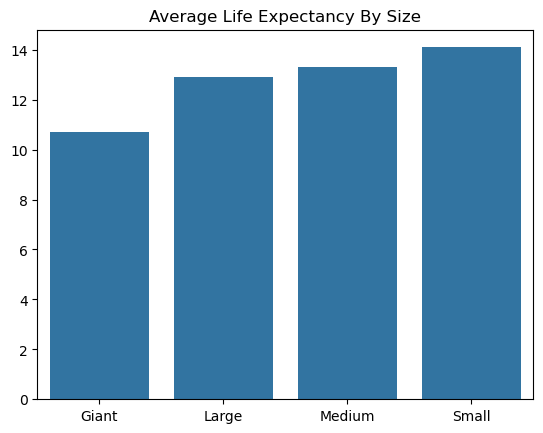

In [160]:
categories = ['Giant','Large','Medium','Small']
values = [10.7,12.9,13.3,14.1]

sns.barplot(x=categories, y=values)
plt.title("Average Life Expectancy By Size")

In [152]:
mmx = (df['Male Max Weight'].sum())/283

In [154]:
fmx = (df['Female Max Weight'].sum())/283

In [157]:
mmn = (df['Male Min Weight'].sum())/283

In [156]:
fmn = (df['Female Min Weight'].sum())/283

In [158]:
print(f'Male max weight is: {mmx}')
print(f'Female max weight is: {fmx}')
print(f'Male min weight is: {mmn}')
print(f'Female min weight is: {fmn}')

Male max weight is: 27.13427561837456
Female max weight is: 26.08833922261484
Male min weight is: 19.30388692579505
Female min weight is: 18.547703180212014


Text(0.5, 1.0, 'Male Vs Female Weight')

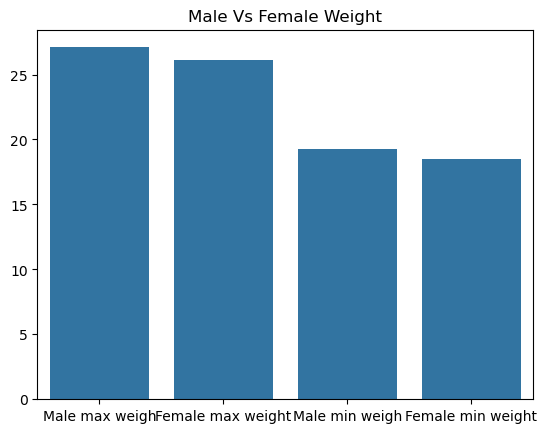

In [159]:
categories1 = ['Male max weigh','Female max weight','Male min weigh','Female min weight']
values1 = [27.1,26.1,19.3,18.5]

sns.barplot(x=categories1, y=values1)
plt.title("Male Vs Female Weight")